## CALOR**IA**S

-Carlos Andres Gomez Orduz - 2202148


-Santiago Meneses Cáceres - 2200255


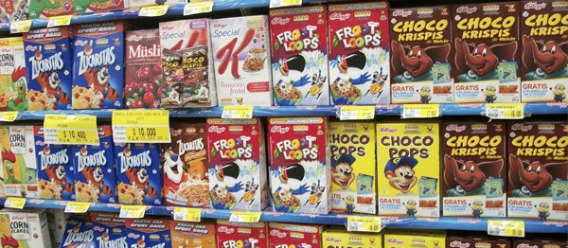

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
pd.__version__

'2.2.2'

In [2]:

from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/My Drive/cereal.csv')
df.describe()


Mounted at /content/drive


,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.597403,6.922078,96.077922,28.246753,2.207792,1.029610,0.821039,42.665705
std,19.484119,1.094790,1.006473,83.832295,2.383364,4.278956,4.444885,71.286813,22.342523,0.832524,0.150477,0.232716,14.047289
min,50.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,40.000000,25.000000,1.000000,1.000000,0.670000,33.174094
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.000000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


In [ ]:
df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


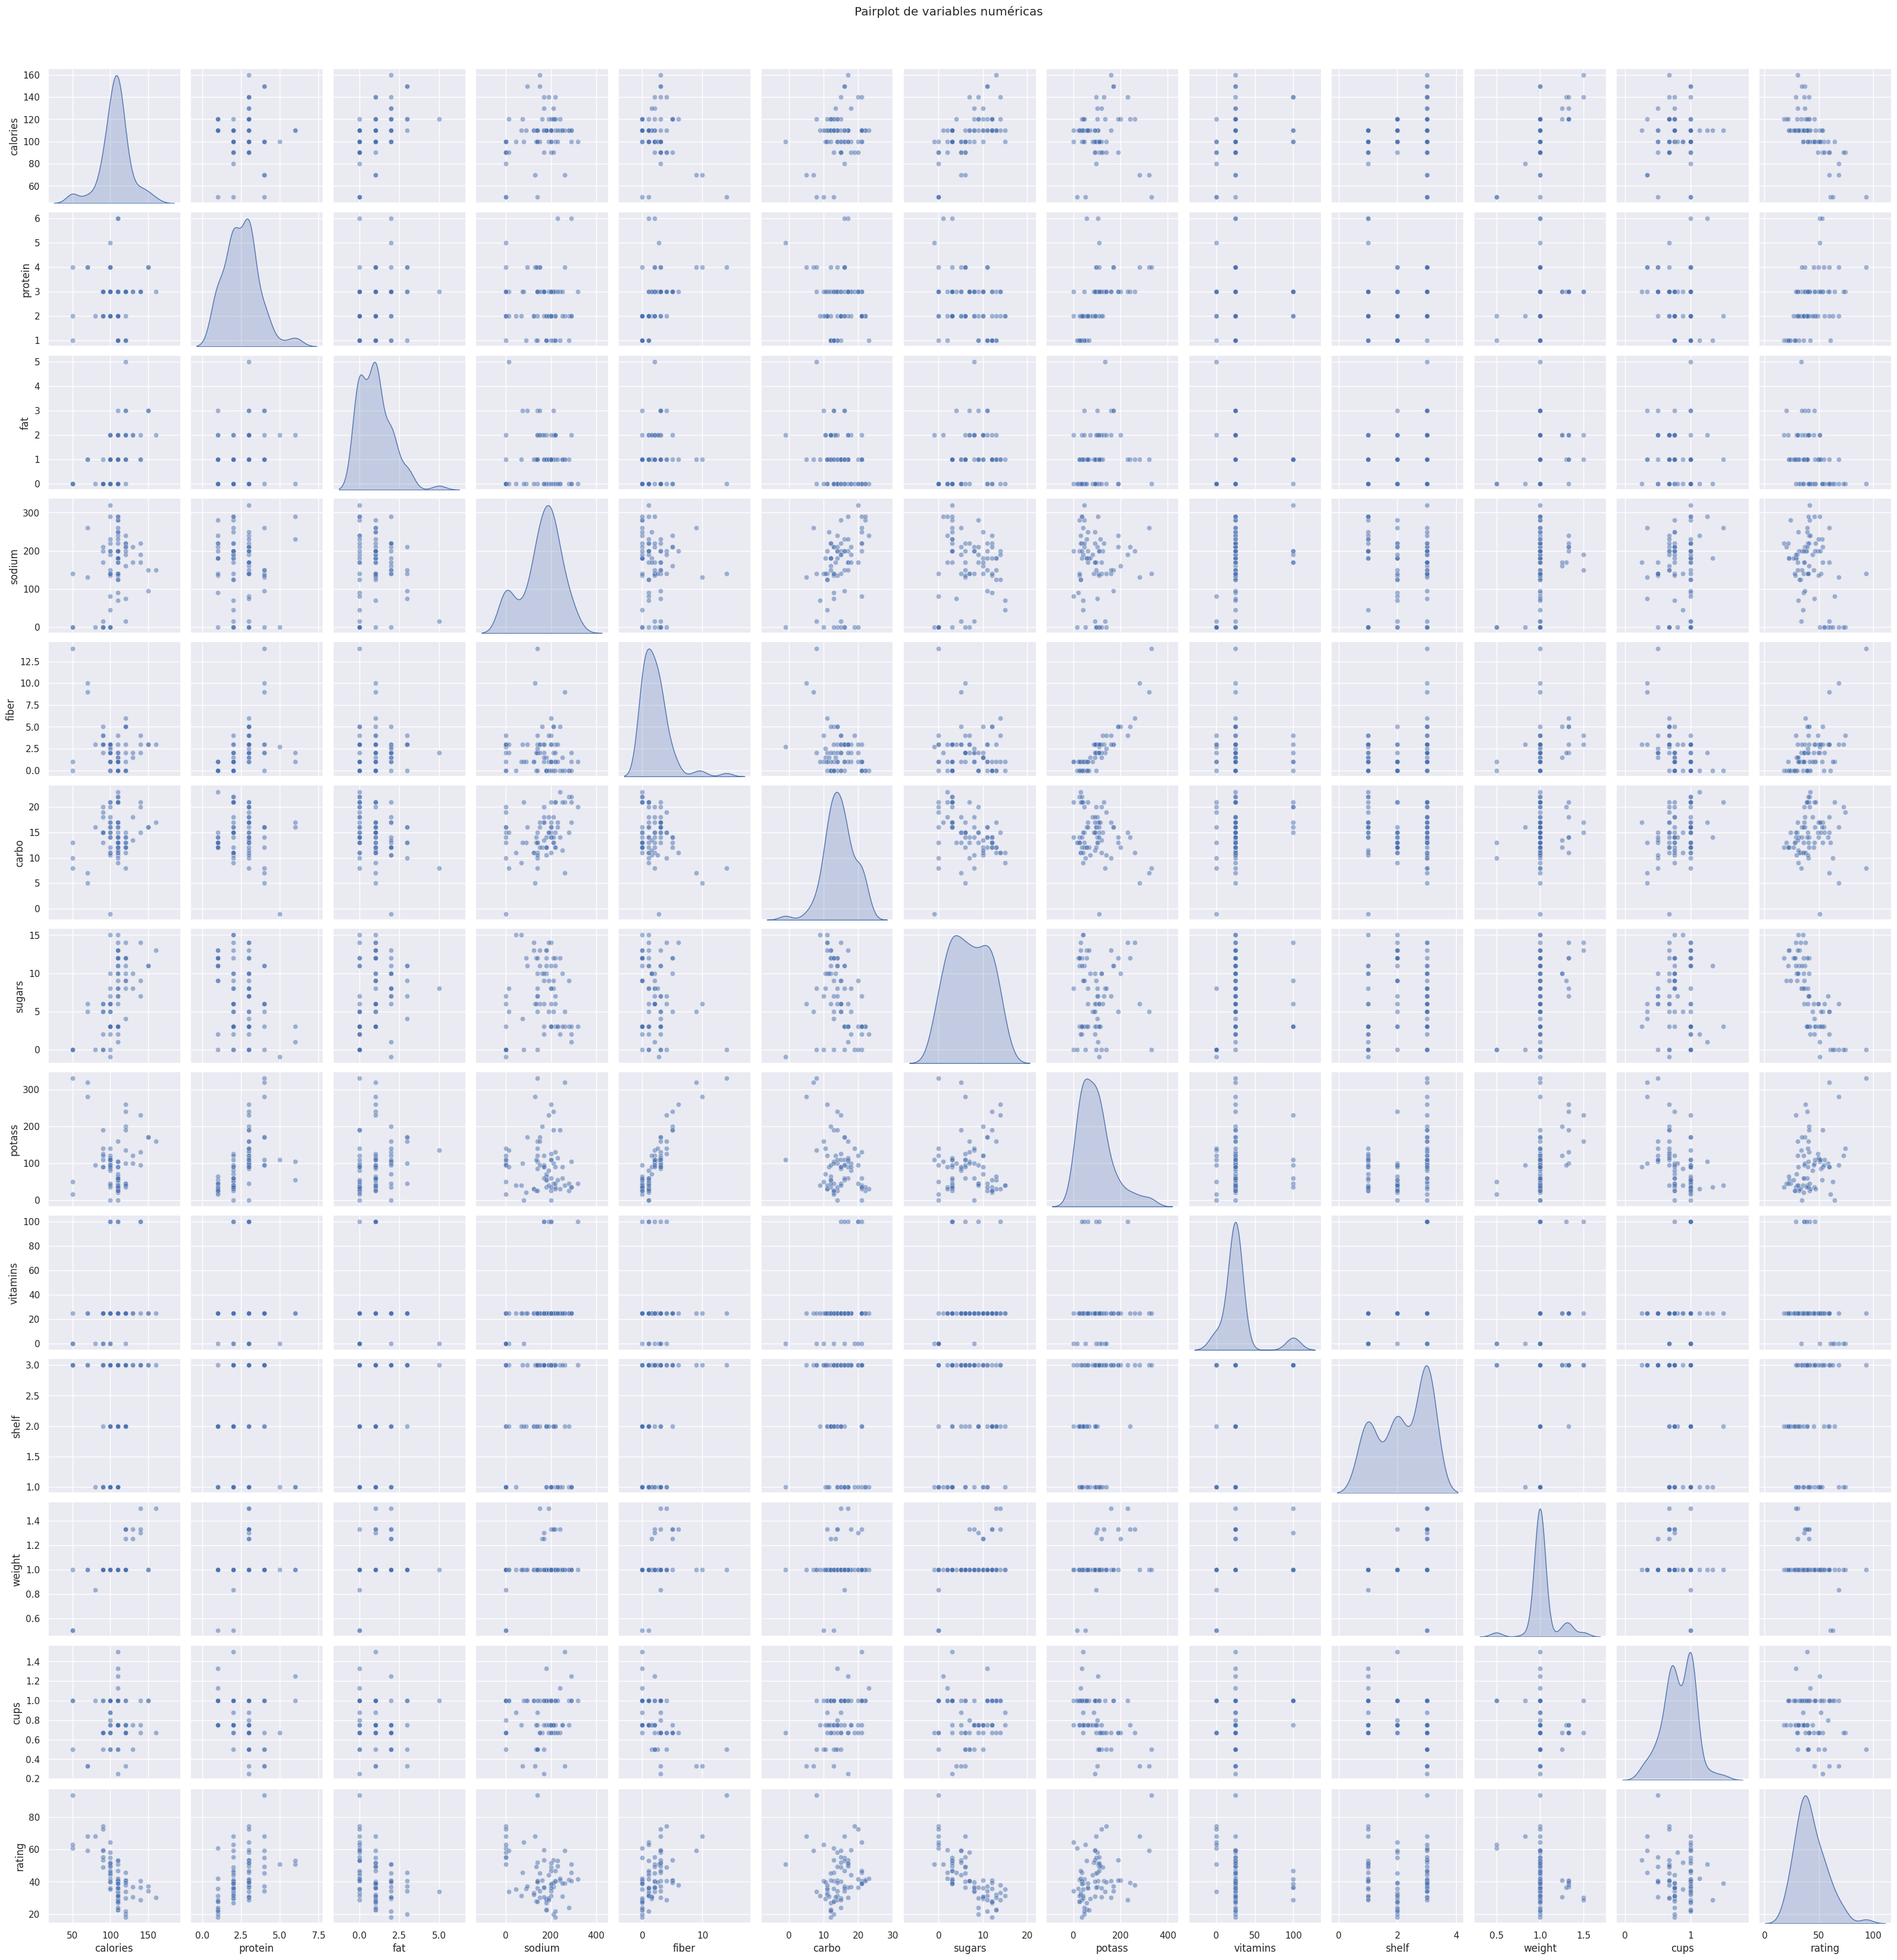

In [6]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

sns.pairplot(df[numeric_columns], diag_kind='kde', plot_kws={'alpha': 0.5})

plt.suptitle("Pairplot de variables numéricas", y=1.02)
plt.show()

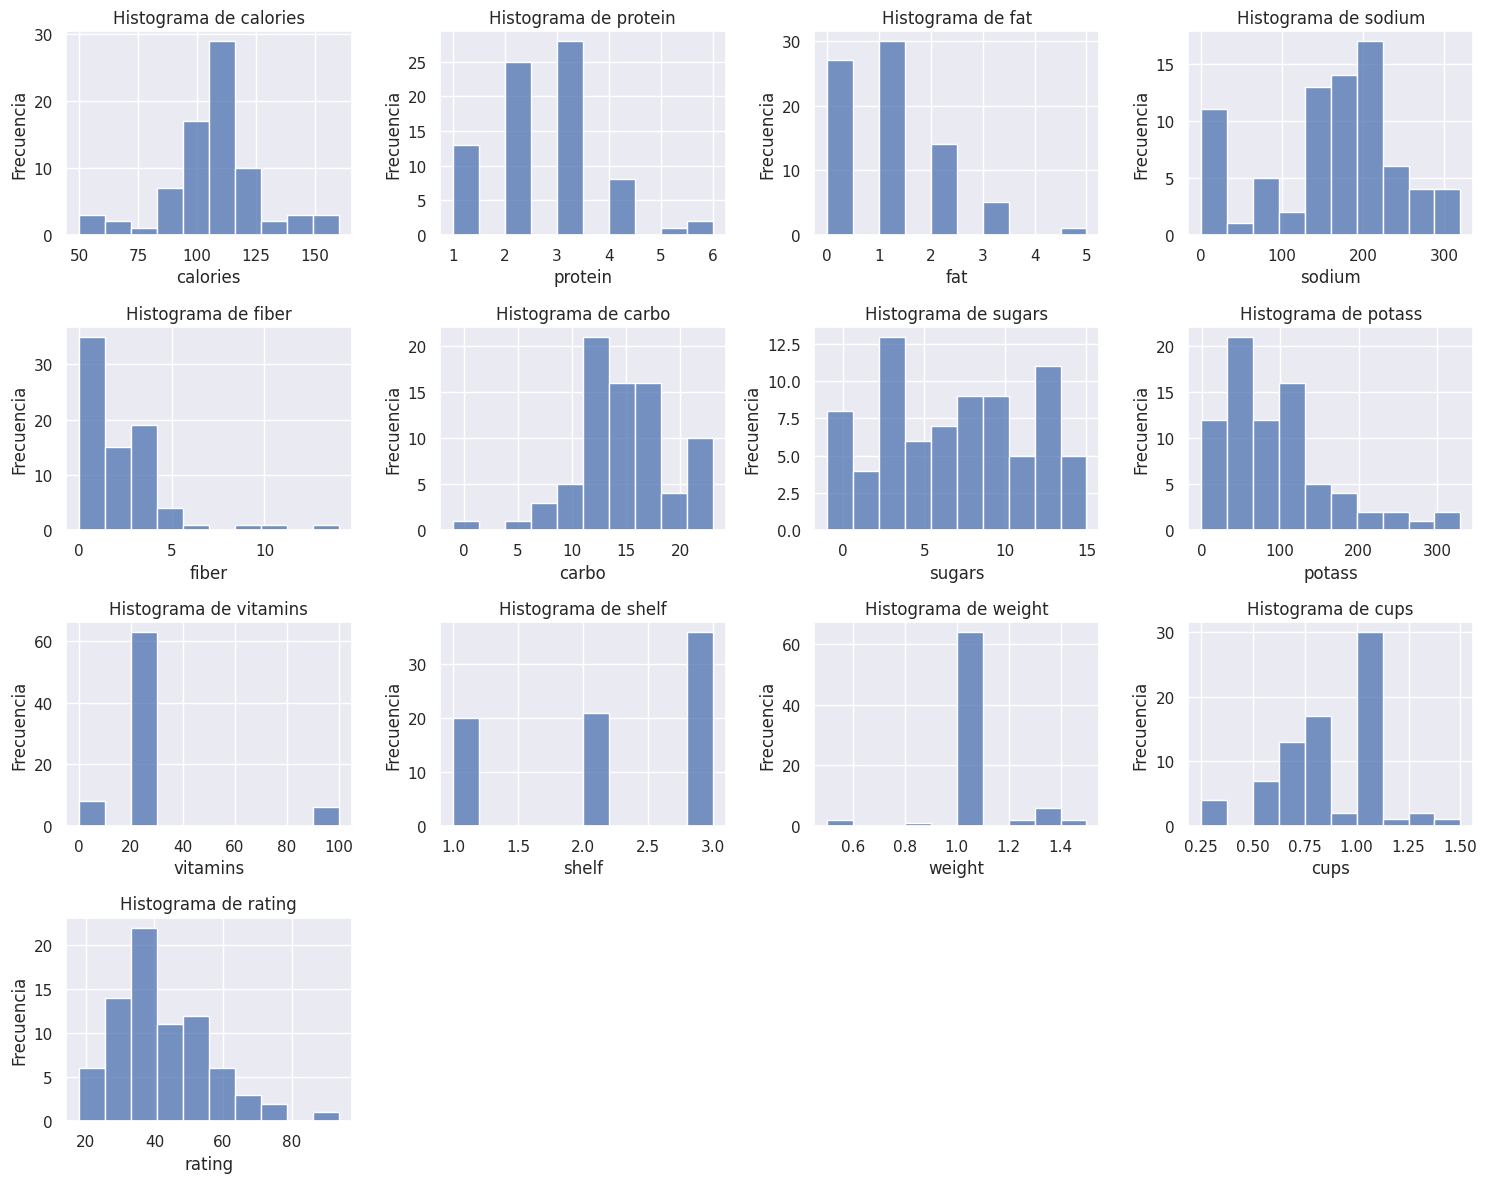

In [ ]:
data =df
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(15, 12))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(4, 4, i)
    sns.histplot(data[col], bins=10)

    plt.title(f'Histograma de {col}')
    plt.xlabel(f'{col}')
    plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

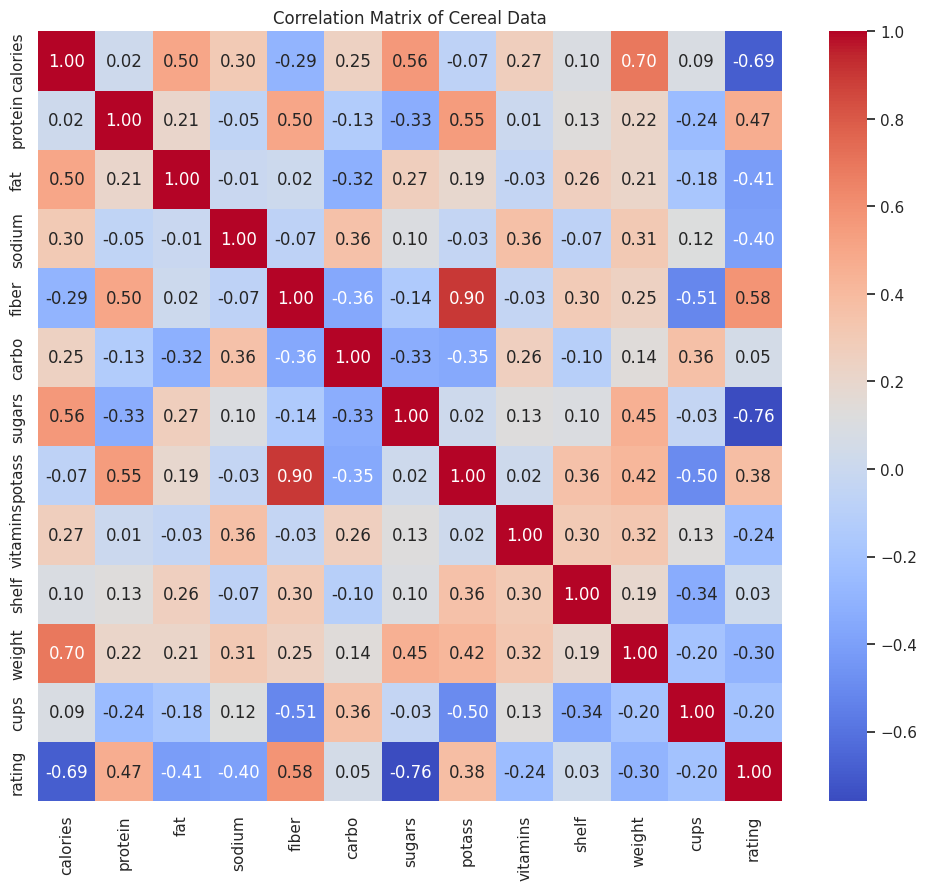

In [ ]:

columns_to_exclude = ['name', 'mfr', 'type']
df_numeric = df.drop(columns=columns_to_exclude)
correlation_matrix = df_numeric.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Cereal Data')
plt.show()

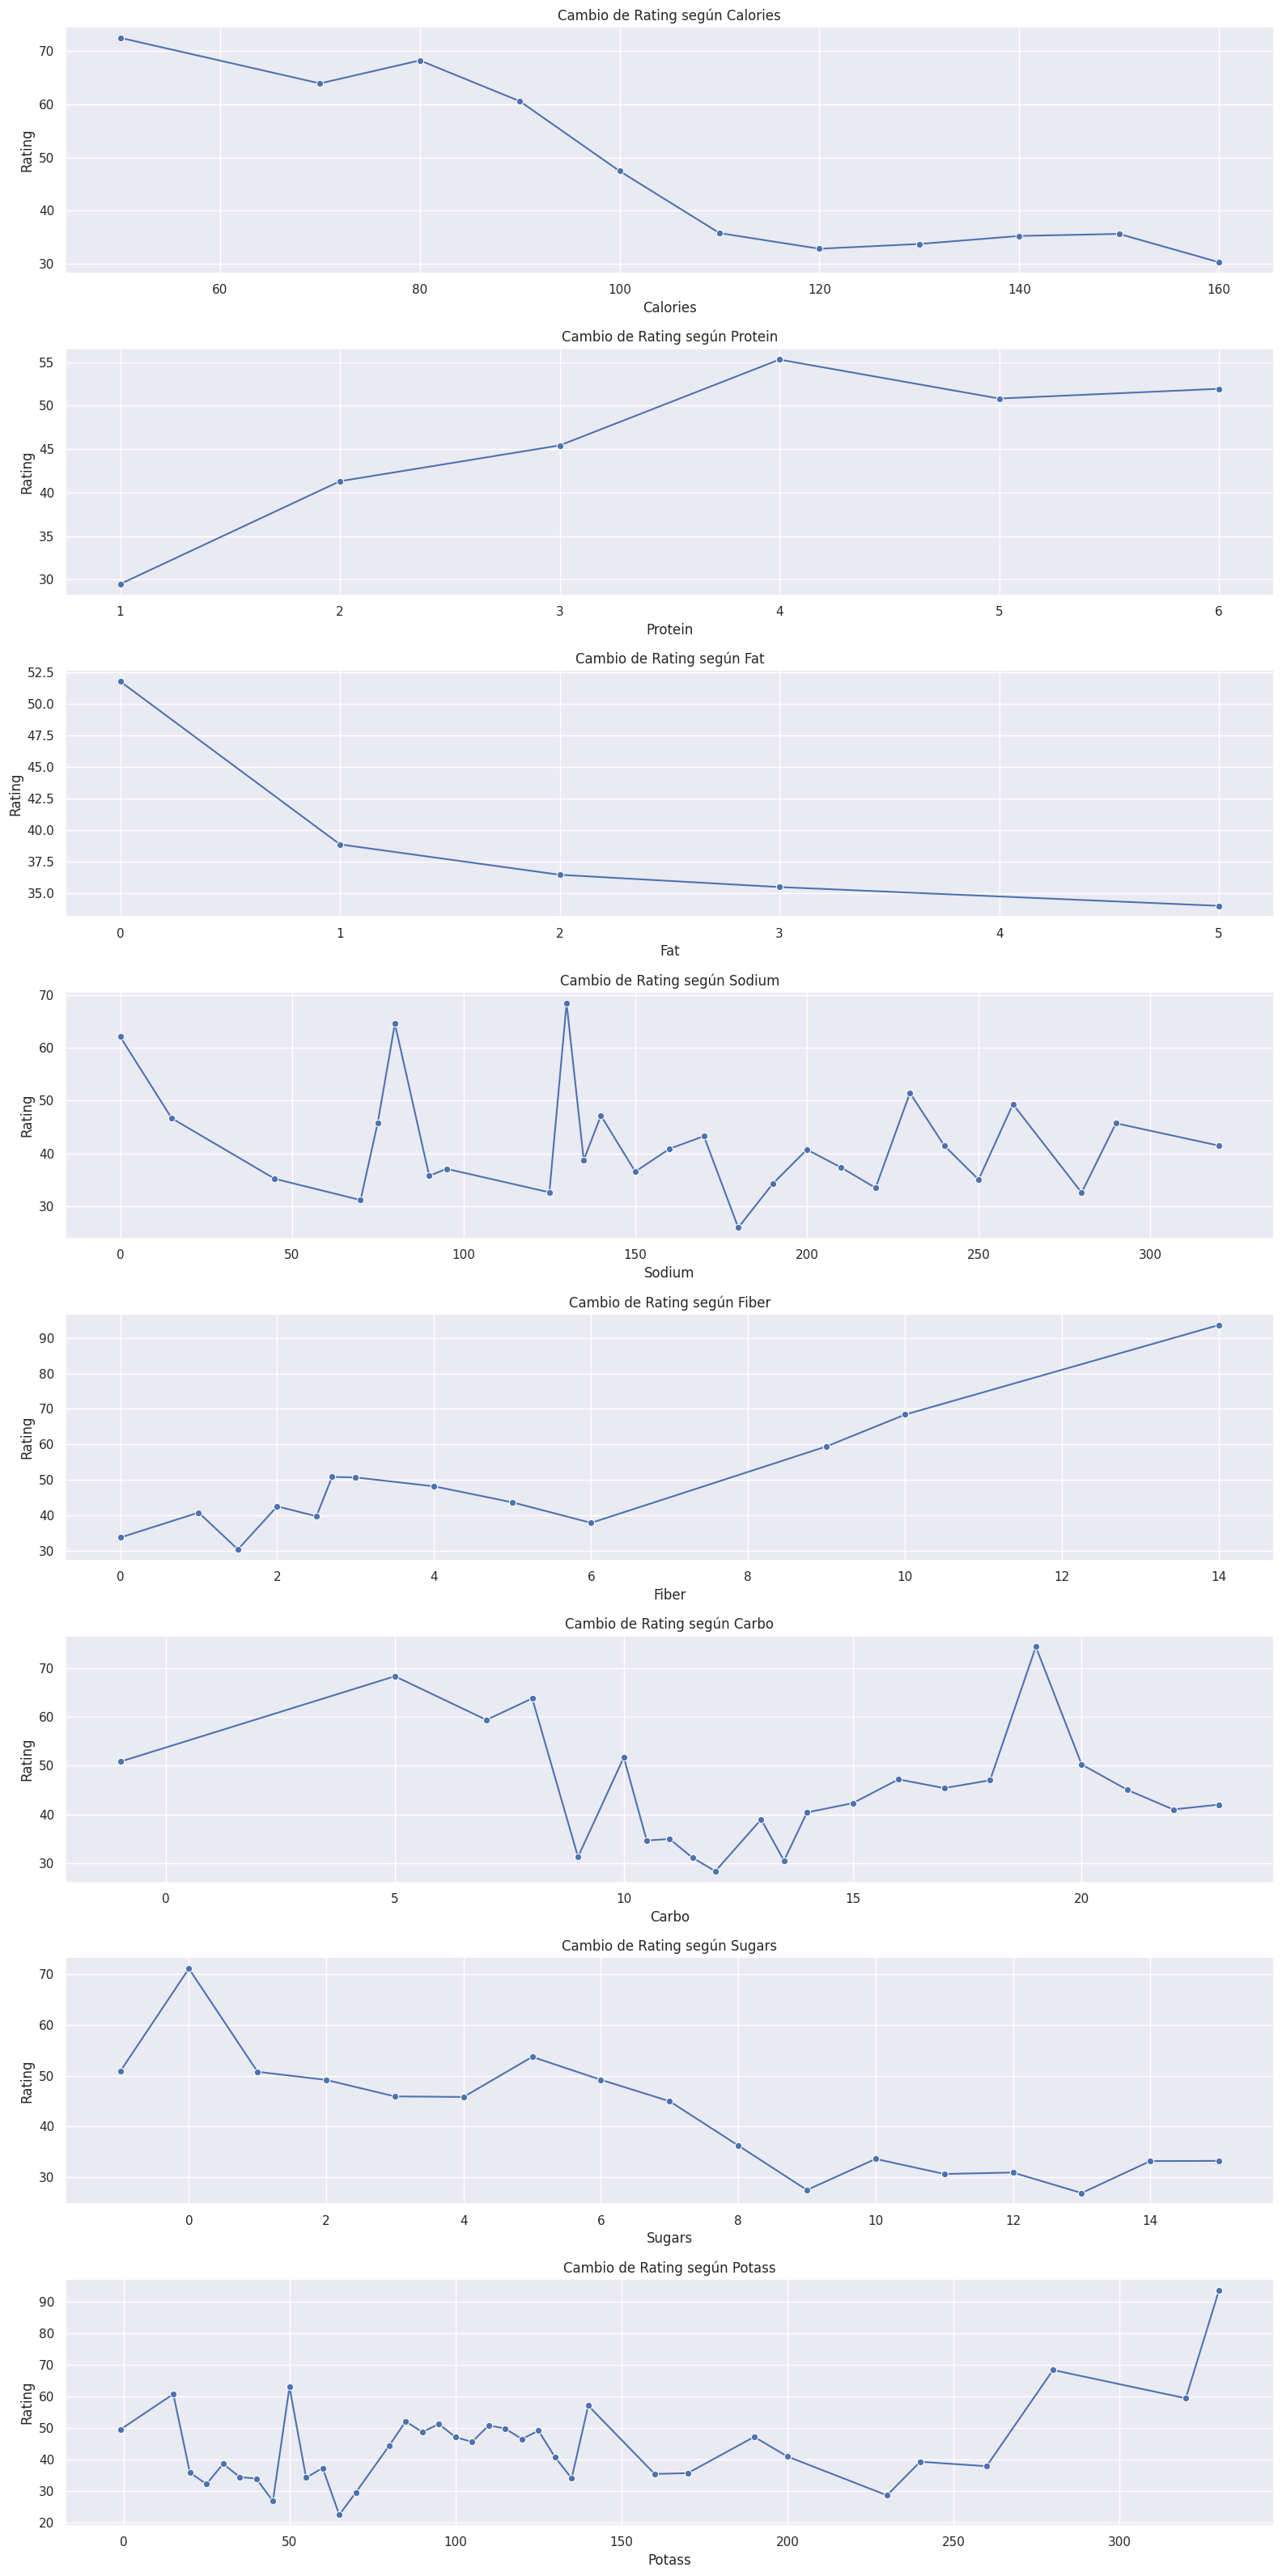

In [9]:
numeric_columns = ['calories', 'protein', 'fat', 'sodium', 'fiber', 'carbo', 'sugars', 'potass']

plt.figure(figsize=(16, len(numeric_columns) * 4))

for i, column in enumerate(numeric_columns, start=1):
    grouped_data = df.groupby(column)['rating'].mean().reset_index()
        plt.subplot(len(numeric_columns), 1, i)
    sns.lineplot(data=grouped_data, x=column, y='rating', marker='o')
    plt.title(f"Cambio de Rating según {column.capitalize()}")
    plt.xlabel(column.capitalize())
    plt.ylabel("Rating")
    plt.grid(True)

plt.tight_layout()
plt.show()

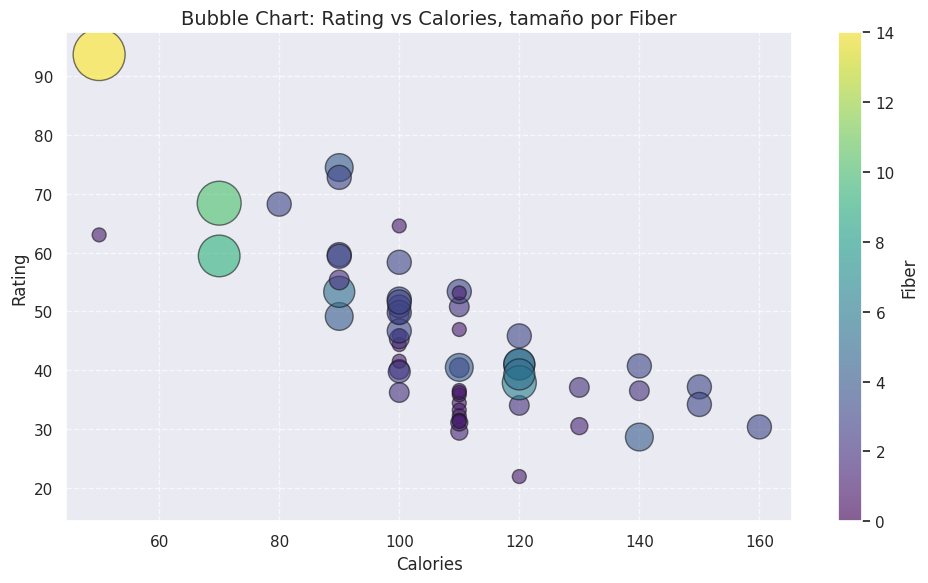

In [10]:
plt.figure(figsize=(10, 6))

bubble_size = df['fiber'] * 100


plt.scatter(df['calories'], df['rating'], s=bubble_size, alpha=0.6, c=df['fiber'], cmap='viridis', edgecolor='k')

plt.title("Bubble Chart: Rating vs Calories, tamaño por Fiber", fontsize=14)
plt.xlabel("Calories", fontsize=12)
plt.ylabel("Rating", fontsize=12)
plt.colorbar(label="Fiber")

plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

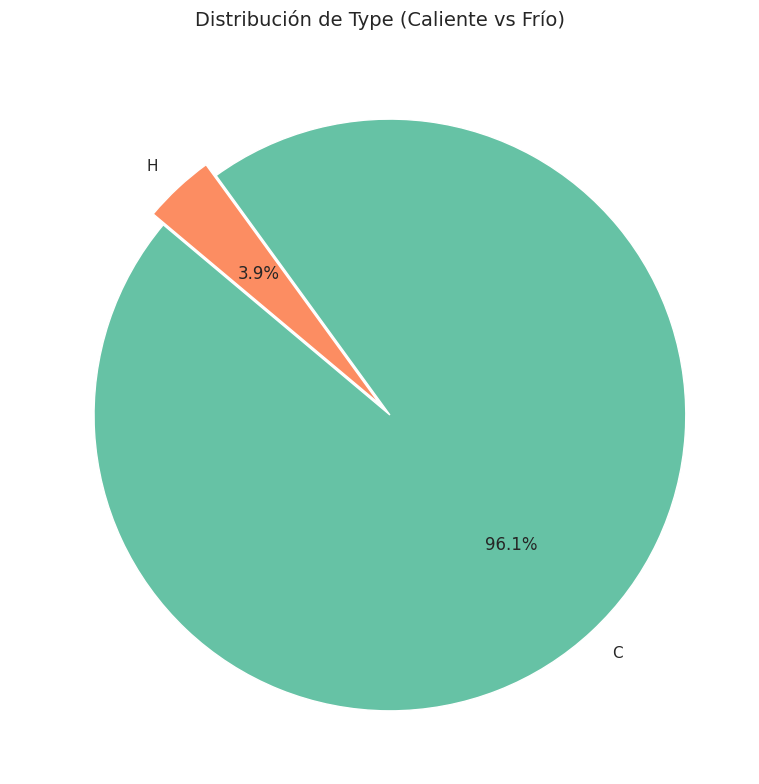

In [11]:
type_counts = df['type'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(
    type_counts,
    labels=type_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=['#66c2a5', '#fc8d62'],
    explode=(0.05, 0)
)

plt.title("Distribución de Type (Caliente vs Frío)", fontsize=14)

plt.tight_layout()
plt.show()

# ***Analisis de regresión:***

Utizando Decision Tree Regressor, Random Forest Regressor y Support Vector Regression (SVR) vamos a predecir el rating de los alimentos en función de sus nutrientes (como proteínas, grasas y carbohidratos) y calorías.

Para evaluar el desempeño de cada modelo, emplearemos cross validation y train test split, lo que nos permitirá medir la precisión y la consistencia de las predicciones en diferentes particiones de los datos. Esto nos ayudará a identificar el modelo más adecuado para estimar el rating basado en las características nutricionales.

In [ ]:
df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

X = df.select_dtypes(include="number").drop(columns=["rating"])
y = df["rating"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

model = DecisionTreeRegressor()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)

print("MAE:", mae)
print("y_test (Valores reales):", np.array(y_test))
print("y_pred (Predicciones):", np.array(y_pred))

MAE: 7.235980687499999
y_test (Valores reales): [93.704912 40.448772 22.736446 34.139765 18.042851 60.756112 44.330856
 28.025765 32.207582 40.400208 36.176196 50.828392 35.782791 23.804043
 36.471512 39.241114]
y_pred (Predicciones): [59.425505 49.511874 22.396513 26.734515 28.742414 63.005645 46.895644
 27.753301 33.174094 49.511874 29.509541 68.235885 31.435973 19.823573
 30.450843 38.839746]


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor

X = df.select_dtypes(include="number").drop(columns=["rating"])
y = df["rating"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

model = RandomForestRegressor()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)

print("MAE:", mae)
print("y_test (Valores reales):", np.array(y_test))
print("y_pred (Predicciones):", np.array(y_pred))

MAE: 5.250275454375001
y_test (Valores reales): [93.704912 40.448772 22.736446 34.139765 18.042851 60.756112 44.330856
 28.025765 32.207582 40.400208 36.176196 50.828392 35.782791 23.804043
 36.471512 39.241114]
y_pred (Predicciones): [62.87685558 46.42453595 24.01069453 33.71166904 26.19295936 63.45848999
 46.527629   27.65967861 31.52547723 44.8110376  35.06815532 63.3055216
 28.22426781 25.77384991 33.71807605 40.36413997]


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error

X = df.select_dtypes(include="number").drop(columns=["rating"])
y = df["rating"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

model = SVR()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)

print("MAE:", mae)
print("y_test (Valores reales):", np.array(y_test))
print("y_pred (Predicciones):", np.array(y_pred))

MAE: 10.983945825260854
y_test (Valores reales): [93.704912 40.448772 22.736446 34.139765 18.042851 60.756112 44.330856
 28.025765 32.207582 40.400208 36.176196 50.828392 35.782791 23.804043
 36.471512 39.241114]
y_pred (Predicciones): [43.61911059 41.85515562 39.93562133 41.11378249 39.54463692 45.69792868
 40.26437372 40.6293442  40.93177355 41.26730979 41.58859353 46.24305809
 42.00477234 40.40481847 40.03889294 40.10967611]




###MAE (Mean Absolute Error):
Es el error absoluto promedio entre los valores reales (y_test) y las predicciones (y_pred).

Desicion Tree: 7.235980687499999

Random Forest: 5.250275454375001

SVR:  10.98394582526085


# 2 punto
## A) División de datos con train_test_split:
utilizaremos curvas de aprendizaje para ajustar los parámetros clave de cada modelo.

DecisionTree: ajustaremos max_depth y criterion.
RandomForest: ajustaremos n_estimators y criterion.
SVR/SVC: ajustaremos kernel y gamma.



In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
X = df.select_dtypes(include="number").drop(columns=["rating"])
y = df["rating"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)
est = DecisionTreeRegressor(max_depth=3)
est.fit(X_train, y_train)
y_pred = est.predict(X_test)
score =  mean_absolute_error(y_test, y_pred)
print("MAE:", score)

MAE: 6.8869099527529745


Usando el modelo de Desicion Tree con una profundidad de 3 se obtiene un error promedio absoluto de 6.89 este valor se puede considerar aceptable debido al contexto y los datos del tataset

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer, mean_squared_error
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size =0.30, random_state=21)
model = RandomForestRegressor(n_estimators=200)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
score1 = mean_squared_error(y_test, y_pred)
print("MAE:", score1)

MAE: 54.2454255418997


Para este caso en el cual se usó el modelo de random forest con 200 estimadores se obtuvo un error promedio absoluto de 54.24 el cual es bastante alto y mucho peor que el modelo anterior,

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

model = SVR(kernel='linear',gamma="scale")
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("MAE:", mae, rmse)

MAE: 0.09240378461863763 0.12702557939844744


 Usando el modelo de suport vector se obtiene un eroor absoluto proemdio de 0.09 y un Root Mean Squared Error de 0.12. los cuales son valores muy buenos y muchisimo mejores que los dos modelos anteriores.

***CONCLUSIONES:***


*   De los tres modelos entrenados con el que se obtuvo mejores resultados fue el modelo SVR.El modelo SVR con un kernel linea se desempeña de buena manera en este dataset
La relación entre las características predictoras (X) y la variable objetivo (rating) es probablemente lineal o casi lineal.

*   El bajo RMSE indica que el modelo no solo tiene bajo error promedio (MAE), sino que también generaliza bien, ya que no está cometiendo errores grandes en los datos de prueba.


* La configuración del SVR (kernel lineal y gamma="scale") parece adecuada para estos datos, lo que demuestra que no es necesario recurrir a kernels más complejos, como el polinomial o radial (RBF)



.

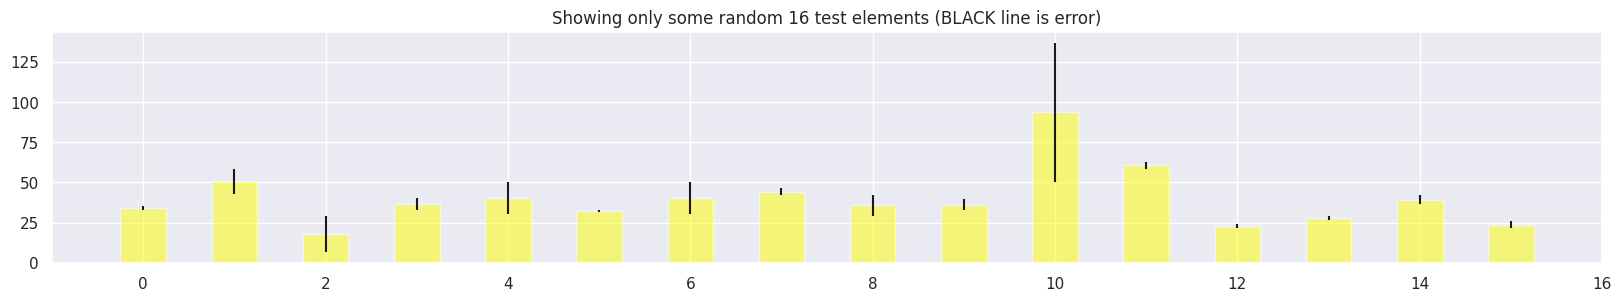

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

X = df.select_dtypes(include="number").drop(columns=["rating"])
y = df["rating"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

est = DecisionTreeRegressor(max_depth=3)
est.fit(X_train, y_train)
y_pred = est.predict(X_test)

errs = np.abs(y_test - y_pred)

plt.figure(figsize=(20, 3))
perm = np.random.permutation(range(len(y_test)))[:40]
plt.bar(range(len(perm)), y_test.iloc[perm], 0.5, yerr=errs.iloc[perm], color="yellow", alpha=0.5)
plt.xlim(-1, len(perm))
plt.title("Showing only some random %d test elements (BLACK line is error)" % len(perm))
plt.show()

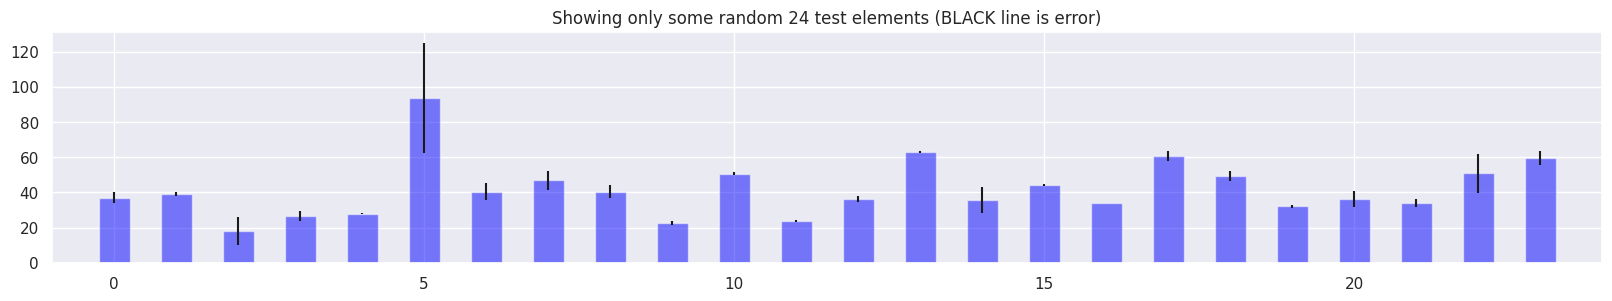

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer, mean_squared_error

X = df.select_dtypes(include="number").drop(columns=["rating"])
y = df["rating"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21)

est = RandomForestRegressor(n_estimators=200)
est.fit(X_train, y_train)
y_pred = est.predict(X_test)

errs = np.abs(y_test - y_pred)

plt.figure(figsize=(20, 3))
perm = np.random.permutation(range(len(y_test)))[:40]
plt.bar(range(len(perm)), y_test.iloc[perm], 0.5, yerr=errs.iloc[perm], color="blue", alpha=0.5)
plt.xlim(-1, len(perm))
plt.title("Showing only some random %d test elements (BLACK line is error)" % len(perm))
plt.show()


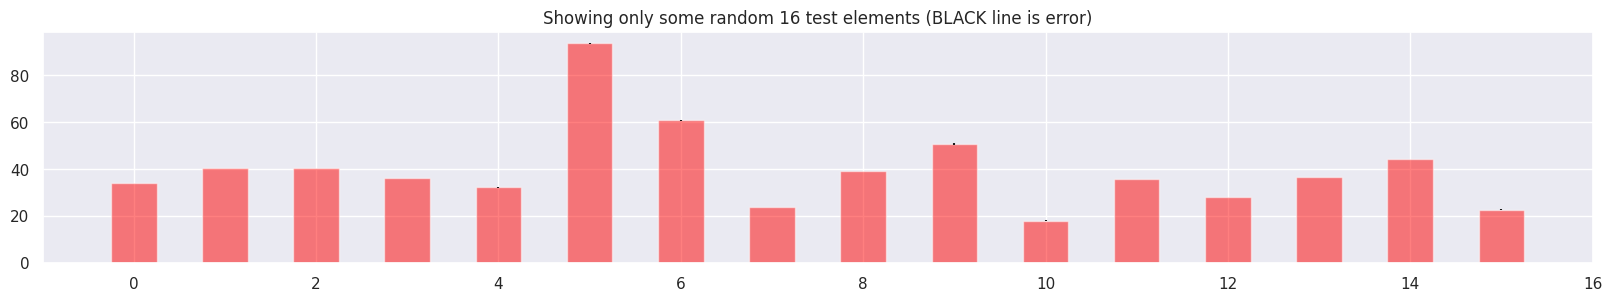

In [ ]:
X = df.select_dtypes(include="number").drop(columns=["rating"])
y = df["rating"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

est = SVR(kernel='linear',gamma="scale")
est.fit(X_train, y_train)
y_pred = est.predict(X_test)

errs = np.abs(y_test - y_pred)

plt.figure(figsize=(20, 3))
perm = np.random.permutation(range(len(y_test)))[:40]  # Selección aleatoria de 40 elementos
plt.bar(range(len(perm)), y_test.iloc[perm], 0.5, yerr=errs.iloc[perm], color="red", alpha=0.5)
plt.xlim(-1, len(perm))
plt.title("Showing only some random %d test elements (BLACK line is error)" % len(perm))
plt.show()


***CONCLUSIONES:***


*  Las predicciones del modelo SVR se ajustan bien a los valores reales, lo que es consistente con los bajos valores de MAE (0.0924) y RMSE (0.1270) obtenidos previamente.Los errores son generalmente pequeños y no parecen variar demasiado entre diferentes ejemplos.

*   Aunque el modelo tiene un buen rendimiento, podría haber outliers (valores atípicos o difíciles de predecir), como en el caso del punto 4, donde el error parece ser más grande.


* El gráfico confirma que el modelo SVR funciona de manera efectiva para predecir los valores objetivo con errores mínimos.





## B) Validación cruzada con cross_val_score:
Determinaremos el mejor número de particiones (folds) para cada modelo utilizando sus parámetros por defecto.

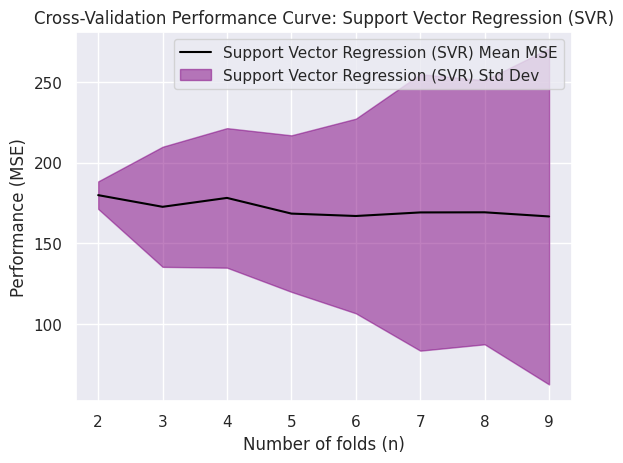

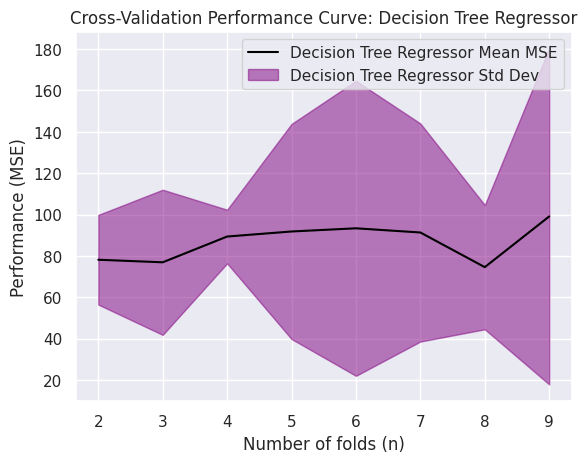

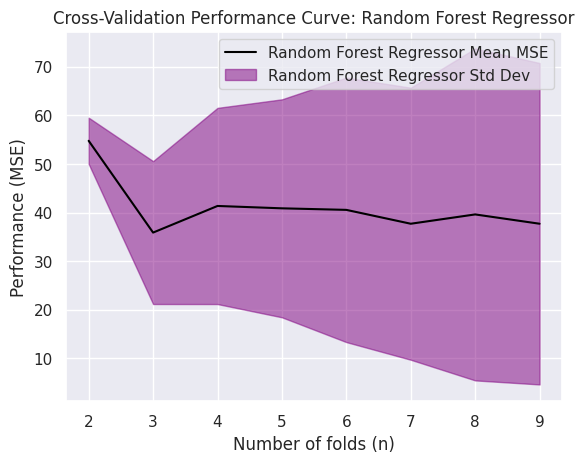

In [ ]:
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.model_selection import cross_val_score, KFold


def show_curve(est, model_name):
    means, stds = [], []
    nfolds_range = range(2, 10)

    for nfolds in nfolds_range:

        s = cross_val_score(est, X, y, cv=KFold(nfolds, shuffle=True, random_state=21), scoring=make_scorer(mean_squared_error))
        means.append(np.mean(s))
        stds.append(np.std(s))


    means = np.r_[means]
    stds = np.r_[stds]


    plt.plot(nfolds_range, means, label=f"{model_name} Mean MSE", color="black")
    plt.fill_between(nfolds_range, means - stds, means + stds, color="purple", alpha=0.5, label=f"{model_name} Std Dev")
    plt.xlabel("Number of folds (n)")
    plt.ylabel("Performance (MSE)")
    plt.title(f"Cross-Validation Performance Curve: {model_name}")
    plt.legend()
    plt.show()

models = {
    "Support Vector Regression (SVR)": SVR(),
    "Decision Tree Regressor": DecisionTreeRegressor(random_state=21),
    "Random Forest Regressor": RandomForestRegressor(random_state=21)
}

for name, model in models.items():
    show_curve(model, name)


##Support Vector Regression (SVR):
El SVR muestra un desempeño limitado, con un error cuadrático medio (MSE) relativamente alto y poca mejora al aumentar el número de folds. Aunque tiene baja variabilidad, el modelo parece subajustar los datos, lo que indica que no captura adecuadamente las relaciones subyacentes. Un número óptimo de folds para este modelo podría ser 2, pero su rendimiento sigue siendo inferior a los otros modelos.

##Decision Tree Regressor:
El modelo de árbol de decisión tiene un MSE moderado, pero muestra alta variabilidad con respecto al número de folds, lo que indica que su desempeño es menos consistente. Con un número de folds de 4 se logra una estabilidad razonable, pero el modelo aún es sensible a los datos de entrenamiento y prueba.

##Random Forest Regressor:
El Random Forest Regressor es el modelo con mejor desempeño, ya que tiene el menor MSE y una desviación estándar baja, lo que lo hace confiable y robusto. A partir de 3 folds, el modelo aumenta su desviacion por lo que la mejor opcion seria usar 3 como numero de folds.

In [ ]:
from sklearn.svm import SVR
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import make_scorer, mean_squared_error
X = df.select_dtypes(include="number").drop(columns=["rating"])
y = df["rating"]
est = SVR()
nfolds = 9
s =cross_val_score(est, X, y, cv=KFold(nfolds, shuffle=True), scoring=make_scorer(mean_squared_error))
print ("MSE  %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

MSE  164.984 (+/- 90.54955)


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import make_scorer, mean_squared_error

X = df.select_dtypes(include="number").drop(columns=["rating"])
y = df["rating"]
est = DecisionTreeRegressor()
nfolds = 4
s =cross_val_score(est, X, y, cv=KFold(nfolds, shuffle=True), scoring=make_scorer(mean_squared_error))
print ("MSE %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))


MSE 68.171 (+/- 7.36442)


In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import make_scorer, mean_squared_error
X = df.select_dtypes(include="number").drop(columns=["rating"])
y = df["rating"]
est = RandomForestRegressor()
nfolds = 3
s =cross_val_score(est, X, y, cv=KFold(nfolds, shuffle=True), scoring=make_scorer(mean_squared_error))
print ("MSE  %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

MSE  38.555 (+/- 18.35903)


# ***Perceptrón***

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import tensorflow as tf
from tensorflow import keras


X = df.select_dtypes(include="number").drop(columns=["rating"])
y = df["rating"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)


model_3_layers = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation=tf.nn.relu),
    tf.keras.layers.Dense(16, activation=tf.nn.relu),
    tf.keras.layers.Dense(8, activation=tf.nn.relu),
    tf.keras.layers.Dense(1, activation='linear')
])


model_3_layers.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mean_absolute_error'])


model_3_layers.fit(X_train, y_train, epochs=10, verbose=1)

y_pred_3 = model_3_layers.predict(X_test, verbose=1).flatten()

mae_3 = mean_absolute_error(y_test, y_pred_3)


print(f"MAE con 3 capas ocultas: {mae_3:.4f}")

model_6_layers = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation=tf.nn.relu),
    tf.keras.layers.Dense(32, activation=tf.nn.relu),
    tf.keras.layers.Dense(16, activation=tf.nn.relu),
    tf.keras.layers.Dense(16, activation=tf.nn.relu),
    tf.keras.layers.Dense(8, activation=tf.nn.relu),
    tf.keras.layers.Dense(8, activation=tf.nn.relu),
    tf.keras.layers.Dense(1, activation='linear')
])

model_6_layers.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mean_absolute_error'])
model_6_layers.fit(X_train, y_train, epochs=10, verbose=1)
y_pred_6 = model_6_layers.predict(X_test, verbose=1).flatten()
mae_6 = mean_absolute_error(y_test, y_pred_6)
print(f"MAE con 6 capas ocultas: {mae_6:.4f}")

model_10_layers = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation=tf.nn.relu),
    tf.keras.layers.Dense(32, activation=tf.nn.relu),
    tf.keras.layers.Dense(32, activation=tf.nn.relu),
    tf.keras.layers.Dense(16, activation=tf.nn.relu),
    tf.keras.layers.Dense(16, activation=tf.nn.relu),
    tf.keras.layers.Dense(8, activation=tf.nn.relu),
    tf.keras.layers.Dense(8, activation=tf.nn.relu),
    tf.keras.layers.Dense(4, activation=tf.nn.relu),
    tf.keras.layers.Dense(4, activation=tf.nn.relu),
    tf.keras.layers.Dense(2, activation=tf.nn.relu),
    tf.keras.layers.Dense(1, activation='linear')
])
model_10_layers.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mean_absolute_error'])
model_10_layers.fit(X_train, y_train, epochs=10, verbose=1)
y_pred_10 = model_10_layers.predict(X_test, verbose=1).flatten()
mae_10 = mean_absolute_error(y_test, y_pred_10)
print(f"MAE con 10 capas ocultas: {mae_10:.4f}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 26.7807 - mean_absolute_error: 26.7807
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 21.9280 - mean_absolute_error: 21.9280 
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 18.5352 - mean_absolute_error: 18.5352
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 15.5922 - mean_absolute_error: 15.5922 
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 14.1648 - mean_absolute_error: 14.1648
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 13.7592 - mean_absolute_error: 13.7592
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 13.3285 - mean_absolute_error: 13.3285
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 13.4890 - mean_absolute_error: 13.4890
Epoch 9/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 13.4893 - mean_absolute_error: 13.4893 
Epoch 10/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 12.7127 - mean_absolute_error: 12.7127
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 35.6606 - mean_absolute_error: 35.6606
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 33.7086 - mean_absolute_error: 33.7086 
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 31.9059 - mean_absolute_error: 31.9059 
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 30.7927 - mean_absolute_error: 30.7927 
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 28.4927 - mean_absolute_error: 28.4927
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 25.5460 - mean_absolute_error: 25.5460 
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 22.3847 - mean_absolute_error: 22.3847 
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 17.7418 - mean_absolute_error: 17.7418 
Epoch 9/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 14.0896 - mean_absolute_error: 14.0896 
Epoch 10/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 14.8048 - mean_absolute_error: 14.8048 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
MAE con 6 cap

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 42.2975 - mean_absolute_error: 42.2975
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 43.1670 - mean_absolute_error: 43.1670 
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 43.5558 - mean_absolute_error: 43.5558 
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 44.2106 - mean_absolute_error: 44.2106 
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 44.6442 - mean_absolute_error: 44.6442 
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 43.1700 - mean_absolute_error: 43.1700 
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 43.8273 - mean_absolute_error: 43.8273 
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 43.3724 - mean_absolute_error: 43.3724 
Epoch 9/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 42.8904 - mean_absolute_error: 42.8904 
Epoch 10/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 42.9234 - mean_absolute_error: 42.9234
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
MAE con 10 